In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [ ]:
data_f=pd.read_csv('/content/1.03.+Dummies.csv')

In [ ]:
data_f

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


if student have more than 75% attendance it is yes else it is no

In [ ]:
raw_data=data_f.copy()

In [ ]:
raw_data['Attendance']=raw_data['Attendance'].map({'Yes':1,'No':0})

In [ ]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [ ]:
raw_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


mean=0.464286   🇰 46% students have more than 75% attendance

##Regression

In [ ]:
y=raw_data['GPA']
x1=raw_data[['SAT','Attendance']]

In [ ]:
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.02e-50
Time:                        09:50:35   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1
...,...,...,...,...
95,1.0,549.80,2009,1
96,1.0,1037.44,2009,0
97,1.0,1504.75,2006,0
98,1.0,648.29,2015,0


In [ ]:
#predict_data=pd.DataFrame({'const':1,'SAT':[1700,1600],'Attendance':[0,1]})

In [ ]:
#predict_data=predict_data[['size','year','view']]
#predict_data

GPA=0.6439 + 0.0014*SAT + 0.2226*Dummy





-->If dummy=1 and dummy=0

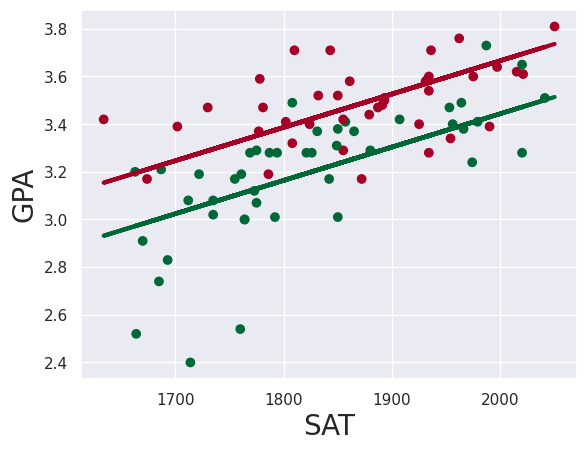

In [ ]:
plt.scatter(raw_data['SAT'],y,c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*raw_data['SAT']
yhat_yes=0.8665+0.0014*raw_data['SAT']
fig=plt.plot(raw_data['SAT'],yhat_no,lw=3,c='#006837')
fig=plt.plot(raw_data['SAT'],yhat_yes,lw=3,c='#a50026')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

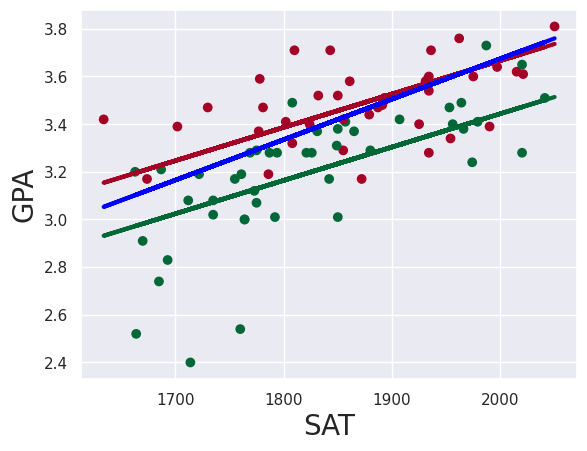

In [ ]:
plt.scatter(raw_data['SAT'],y,c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*raw_data['SAT']
yhat_yes=0.8665+0.0014*raw_data['SAT']
yhat=0.0017*raw_data['SAT']+0.275
fig=plt.plot(raw_data['SAT'],yhat_no,lw=3,c='#006837')
fig=plt.plot(raw_data['SAT'],yhat_yes,lw=3,c='#a50026')
fig=plt.plot(raw_data['SAT'],yhat,lw=3,c='blue')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

#EXERCISE

In [ ]:
data_frame=pd.read_csv('/content/real_estate_price_size_year_view.csv')

In [ ]:
data_frame

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [ ]:
new_data=data_frame.copy()

In [ ]:
new_data['view']=new_data['view'].map({'Sea view':1 ,'No sea view':0})

In [ ]:
new_data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [ ]:
new_data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


###Defining Variable

In [ ]:
y=new_data['price']
x1=new_data[['size','year','view']]

In [ ]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.02e-50
Time:                        09:53:34   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Predictions for our data

In [ ]:
x

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1
...,...,...,...,...
95,1.0,549.80,2009,1
96,1.0,1037.44,2009,0
97,1.0,1504.75,2006,0
98,1.0,648.29,2015,0


In [ ]:
x["const"]=x["const"].astype(int)

In [ ]:
x

,const,size,year,view
0,1,643.09,2015,0
1,1,656.22,2009,0
2,1,487.29,2018,1
3,1,1504.75,2015,0
4,1,1275.46,2009,1
...,...,...,...,...
95,1,549.80,2009,1
96,1,1037.44,2009,0
97,1,1504.75,2006,0
98,1,648.29,2015,0


In [ ]:
predict_data=pd.DataFrame({'const':1,'size':[750,1000],'year':[2016,2018],'view':[0,1]})

In [ ]:
predict_data=predict_data[['const','size','year','view']]
predict_data

,const,size,year,view
0,1,750,2016,0
1,1,1000,2018,1


In [ ]:
predict_data.rename(index={0:'house 1',1:'house 2'})

,const,size,year,view
house 1,1,750,2016,0
house 2,1,1000,2018,1


In [ ]:
predictions=results.predict(predict_data)
predictions

0    250760.492512
1    368682.314949
dtype: float64